In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Drawing random numbers from an arbitrary PDF

In [2]:

def pdf(x: float):  
    mu, sig = -0.5, 0.1
    return np.exp(-(x - mu)**2 / (2 * sig**2)) 


def generate_rand_from_pdf(pdf, n, xmin, xmax): 
    xvals = np.linspace(xmin, xmax, n*10) 
    pdfvals = np.array([ pdf(x) for x in xvals]) 
    cdf = np.cumsum(pdfvals)
    cdf = cdf / cdf[-1] 
    values = np.random.rand(n)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = xvals[value_bins]
    return random_from_cdf

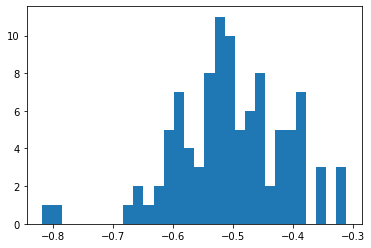

In [6]:

rands = generate_rand_from_pdf(pdf, 100, -2.,2.)

counts, bin_edges, _ = plt.hist(rands,bins=30)

Text(0.3, 10.0, 'mean$=-0.503 $\nstd$=0.092 $\nconstant$=7.687 \\pm 0.775$\n$\\mu=-0.502 \\pm 0.010$\n$\\sigma=-0.088 \\pm 0.010$')

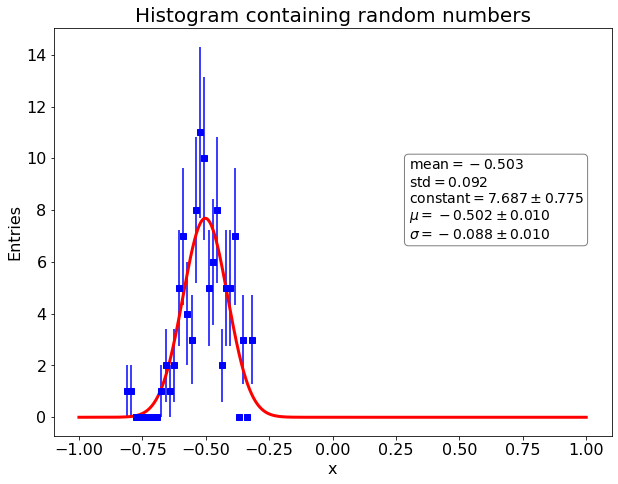

In [17]:
import scipy.stats

bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

#Create data points for the fit function
x = np.linspace(-1,1,1000)

#Define a gaussian function to use for the fit.
#a, x0, sigma will be the fitter parameters
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#Fitted parameters and covariance matrix
popt, pcov = scipy.optimize.curve_fit(f = gaus, xdata = bin_centers, ydata=counts)

#Calculate data and fit parameters 
data_mean = np.mean(rands)
data_std = np.std(rands, ddof=1)
fit_constant, fit_constant_error = popt[0], np.sqrt(pcov[0,0])
fit_mean, fit_mean_error = popt[1], np.sqrt(pcov[1,1])
fit_std, fit_std_error = popt[2], np.sqrt(pcov[2,2])

#Create a figure
fig = plt.figure(figsize=(10,7.5))

#Plot data with errors
plt.errorbar(bin_centers, counts, np.sqrt(counts),
             fmt='s', color='blue', capthick=1)

#Plot fit function
plt.plot(x, gaus(x, *popt), color='red', linewidth=3, label=r'Fitted function')

#Add titles and make the plot pretty
plt.title('Histogram containing random numbers', fontsize=20)
plt.xlabel(r'x', fontsize=16);
plt.ylabel(r'Entries', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Add a statistics box
textstr = '\n'.join((
    r'mean$=%.3f $' % (data_mean),
    r'std$=%.3f $' % data_std,
    r'constant$=%.3f \pm %.3f$' % (fit_constant, fit_constant_error),
    r'$\mu=%.3f \pm %.3f$' % (fit_mean, fit_mean_error),
    r'$\sigma=%.3f \pm %.3f$' % (fit_std, fit_std_error)))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.3, 10., textstr, fontsize=14,
        verticalalignment='top', bbox=props)
